# Analysis of last billiards game with my father

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
from matplotlib.lines import Line2D

Last 13. August my father (**Juan**) and me (**Sergio**) played a **3-carom billiards game** (a super difficult category of billiards) and here you have a brief analysis of the results.

## Loading data

In [232]:
df = pd.read_csv('results.csv', header=[0, 1], index_col=0)
df.index.names = ['entrada']
players = ['Sergio', 'Juan']
df.head()

jugador Sergio              Juan           
param   tiempo carambolas tiempo carambolas
entrada                                    
1        20.95          0  23.46          0
2        24.91          0  27.68          0
3        38.38          1  16.95          0
4        38.83          1  29.43          0
5        20.83          0  33.60          0

In [235]:
# average time by stroke
for player in players:
    df[player, 'tiempo_por_tacada'] = df[player, 'tiempo'] / (df[player, 'carambolas'] + 1)
df = df.reindex(columns= players, level=0)
df.head()

jugador Sergio                                Juan             \
param   tiempo carambolas tiempo_por_tacada tiempo carambolas   
entrada                                                         
1        20.95          0            20.950  23.46          0   
2        24.91          0            24.910  27.68          0   
3        38.38          1            19.190  16.95          0   
4        38.83          1            19.415  29.43          0   
5        20.83          0            20.830  33.60          0   

jugador                    
param   tiempo_por_tacada  
entrada                    
1                   23.46  
2                   27.68  
3                   16.95  
4                   29.43  
5                   33.60

In [236]:
df_cumsum = df.cumsum()
# calculate average
for player in players:
    df_cumsum[player, 'promedio'] = df_cumsum[player, 'carambolas'] / df_cumsum.index
# calculate difference (delta)
df_cumsum = df_cumsum.reindex(columns= players, level=0)
df_cumsum['vs', 'delta'] = df_cumsum[players[0], 'carambolas'] - df_cumsum[players[1], 'carambolas']
df_cumsum.head()

jugador  Sergio                                           Juan             \
param    tiempo carambolas tiempo_por_tacada  promedio  tiempo carambolas   
entrada                                                                     
1         20.95        0.0            20.950  0.000000   23.46        0.0   
2         45.86        0.0            45.860  0.000000   51.14        0.0   
3         84.24        1.0            65.050  0.333333   68.09        0.0   
4        123.07        2.0            84.465  0.500000   97.52        0.0   
5        143.90        2.0           105.295  0.400000  131.12        0.0   

jugador                               vs  
param   tiempo_por_tacada promedio delta  
entrada                                   
1                   23.46      0.0   0.0  
2                   51.14      0.0   0.0  
3                   68.09      0.0   1.0  
4                   97.52      0.0   2.0  
5                  131.12      0.0   2.0

## Juan wins by 13 caroms!

In [208]:
df_cumsum.loc[60]

jugador  param            
Sergio   tiempo               1842.410000
         carambolas             15.000000
         tiempo_por_tacada    1529.752500
         promedio                0.250000
Juan     tiempo               2564.530000
         carambolas             28.000000
         tiempo_por_tacada    1704.613333
         promedio                0.466667
vs       delta                 -13.000000
Name: 60, dtype: float64

## Plotting caroms by tackles

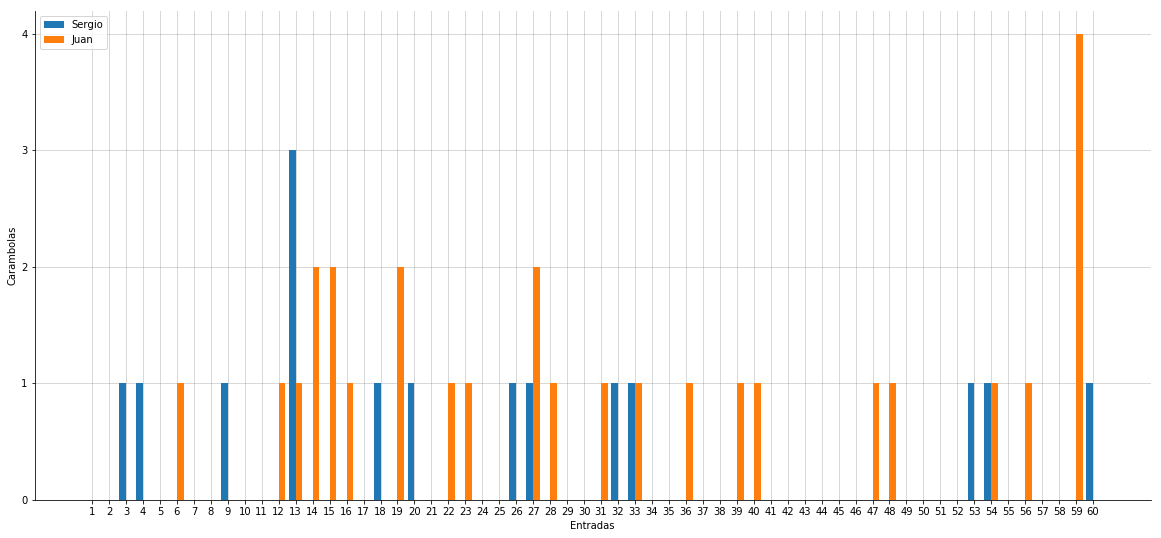

In [209]:
fig, ax = plt.subplots(figsize=(20, 9))

bar_width = .4
index = np.arange(df.shape[0])
xticks = index - ((len(players) * bar_width) / 2)

for i, player in enumerate(players):
    ax.bar(
        xticks + (i * bar_width),
        df[player, 'carambolas'],
        width=bar_width,
        label=player,
        align='edge',
        joinstyle='round'
    )

ax.set_xticks(index)
ax.set_xticklabels(df.index)
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.legend()
ax.set_xlabel('Entradas')
ax.set_ylabel('Carambolas')
ax.set_yticks(np.arange(5));

## Plotting time by tackles

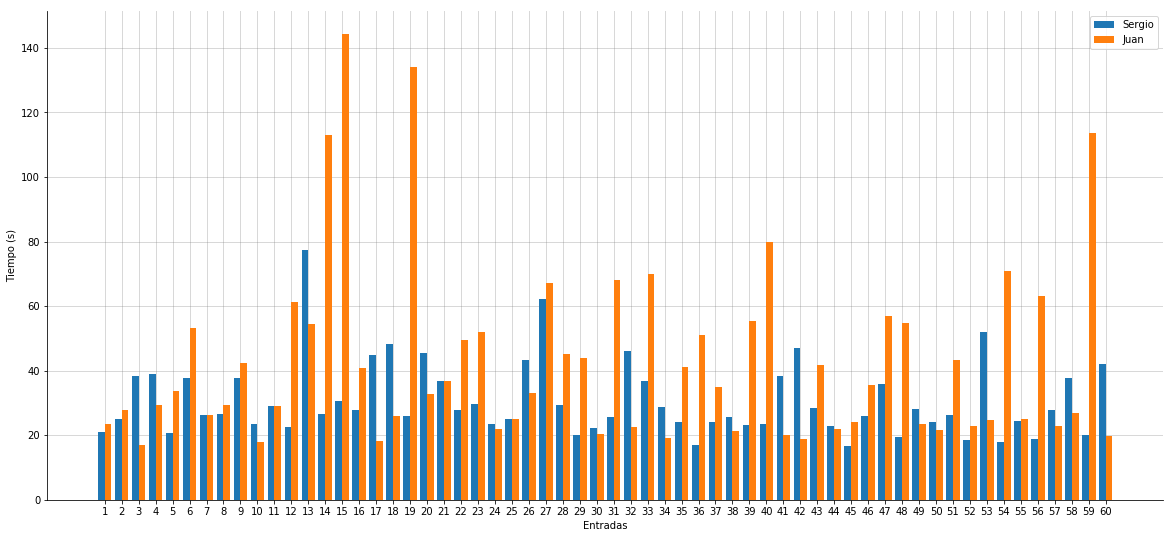

In [210]:
fig, ax = plt.subplots(figsize=(20, 9))

bar_width = .4
index = np.arange(df.shape[0])
xticks = index - ((len(players) * bar_width) / 2)

for i, player in enumerate(players):
    ax.bar(
        xticks + (i * bar_width),
        df[player, 'tiempo'],
        width=bar_width,
        label=player,
        align='edge',
        joinstyle='round'
    )

ax.set_xticks(index)
ax.set_xticklabels(df.index)
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.legend()
ax.set_xlabel('Entradas')
ax.set_ylabel('Tiempo (s)');

## Plotting cumulative caroms

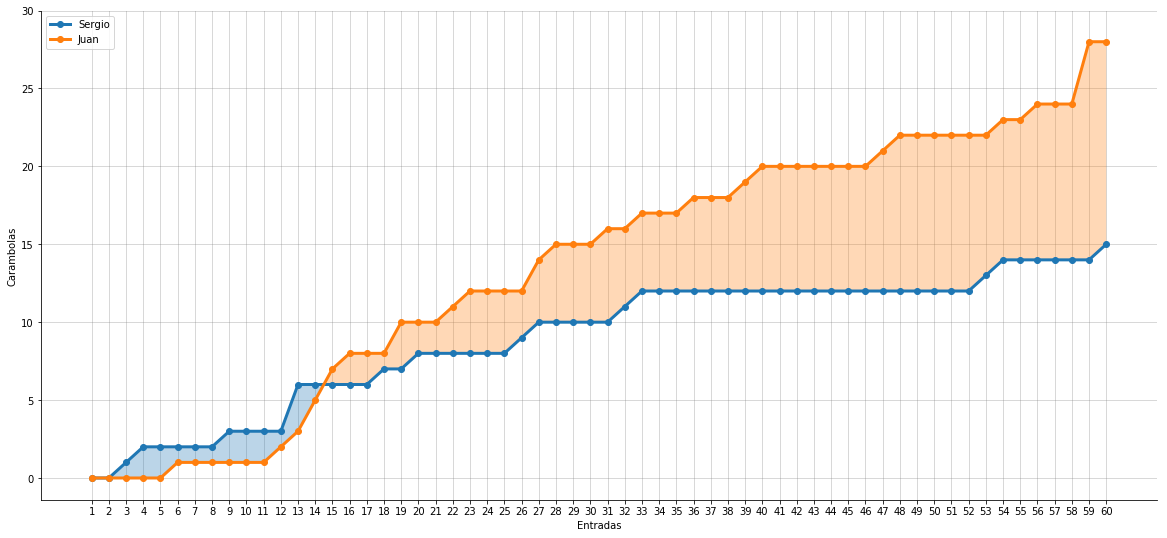

In [226]:
VARIABLE = 'carambolas'

fig, ax = plt.subplots(figsize=(20, 9))
xticks = df_cumsum.index
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for player in players:
    ax.plot(xticks, df_cumsum[player, VARIABLE], label=player, linewidth=3, marker='o')
# fill regions
y1, y2 = [df_cumsum[player, VARIABLE] for player in players]
ax.fill_between(xticks, y1, y2, where=y2 <= y1, alpha=0.3, interpolate=True)
ax.fill_between(xticks, y1, y2, where=y2 >= y1, alpha=0.3, interpolate=True)

ax.legend()
ax.set_xlabel('Entradas')
ax.set_ylabel('Carambolas')
ax.set_xticks(xticks)
ax.set_yticks(np.arange(0, 31, 5));

## Plotting average of caroms

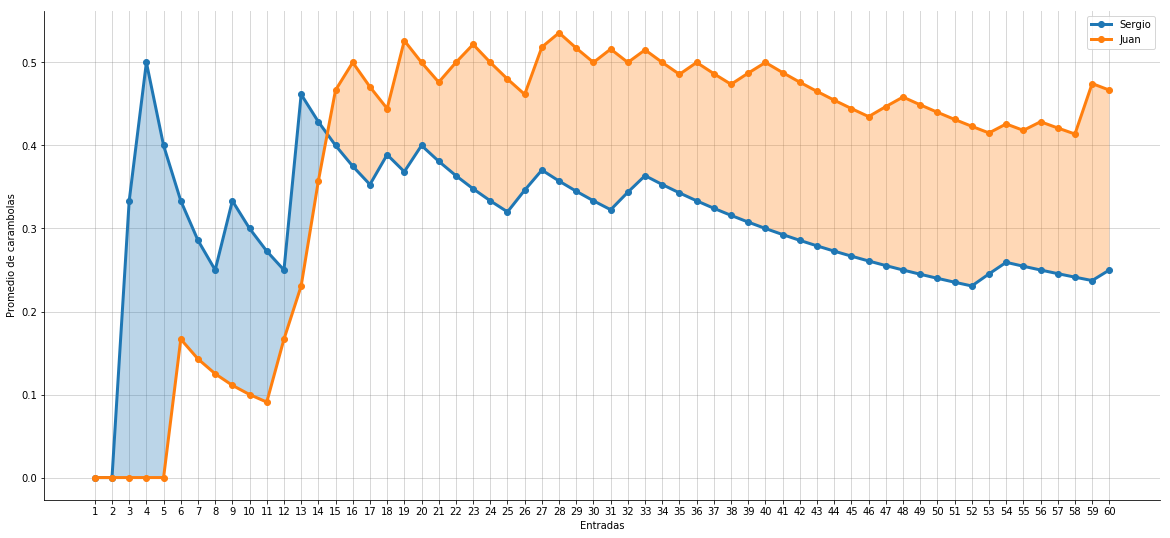

In [227]:
VARIABLE = 'promedio'

fig, ax = plt.subplots(figsize=(20, 9))
xticks = df_cumsum.index
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for player in players:
    ax.plot(xticks, df_cumsum[player, VARIABLE], label=player, linewidth=3, marker='o')
# fill regions
y1, y2 = [df_cumsum[player, VARIABLE] for player in players]
ax.fill_between(xticks, y1, y2, where=y2 <= y1, alpha=0.3, interpolate=True)
ax.fill_between(xticks, y1, y2, where=y2 >= y1, alpha=0.3, interpolate=True)

ax.legend()
ax.set_xlabel('Entradas')
ax.set_ylabel('Promedio de carambolas')
ax.set_xticks(xticks);

## Plotting average time by stroke

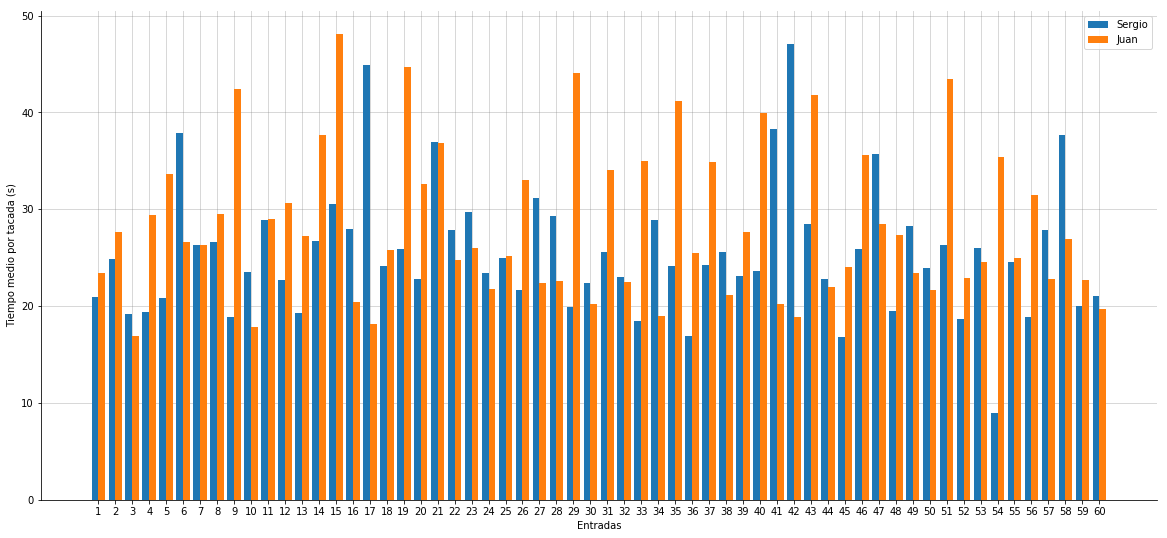

In [215]:
fig, ax = plt.subplots(figsize=(20, 9))

bar_width = .4
index = np.arange(df.shape[0])
xticks = index - ((len(players) * bar_width) / 2)

for i, player in enumerate(players):
    ax.bar(
        xticks + (i * bar_width),
        df[player, 'tiempo_por_tacada'],
        width=bar_width,
        label=player,
        align='edge',
        joinstyle='round'
    )

ax.set_xticks(index)
ax.set_xticklabels(df.index)
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.legend()
ax.set_xlabel('Entradas')
ax.set_ylabel('Tiempo medio por tacada (s)');

In [216]:
df.loc[:, pd.IndexSlice[:, 'tiempo_por_tacada']].describe()

jugador,Sergio,Juan
param,tiempo_por_tacada,tiempo_por_tacada
count,60.000000,60.000000
mean,25.495875,28.410222
std,6.709162,7.798545
min,8.995000,16.950000
25%,21.017500,22.602500
50%,24.380000,26.470000
75%,28.012500,33.706250
max,47.060000,48.116667


## Plotting differences in caroms

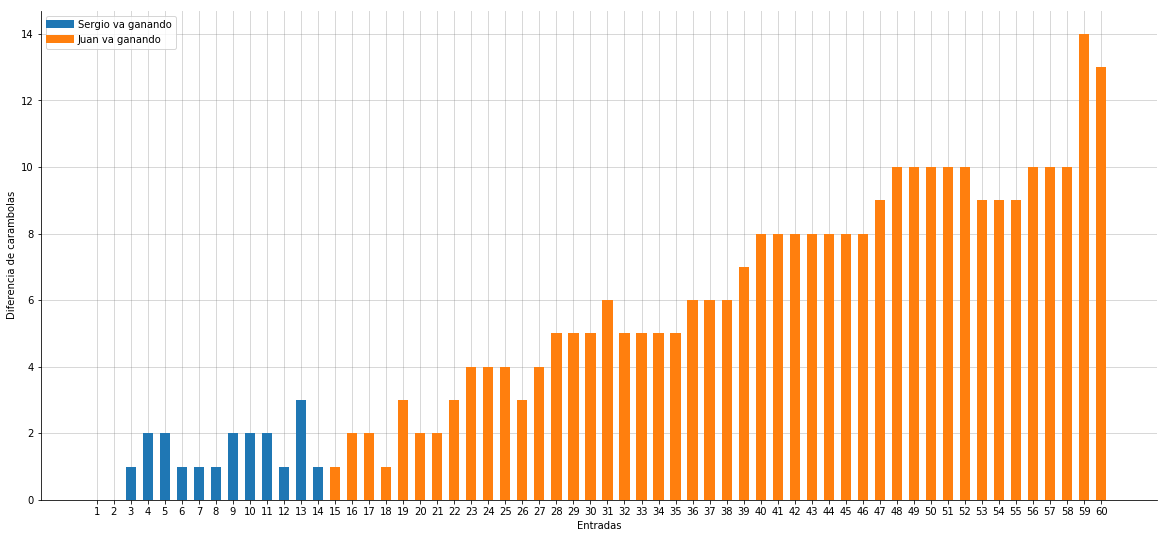

In [263]:
# custom legend
legend_lines = [
    Line2D([0], [0], color='C0', lw=8),
    Line2D([0], [0], color='C1', lw=8),
]
legend_titles = [
    'Sergio va ganando',
    'Juan va ganando'
]

delta_positive = df_cumsum['vs', 'delta'] > 0

fig, ax = plt.subplots(figsize=(20, 9))

bar_width = .6
index = np.arange(df.shape[0])
xticks = df_cumsum.index

ax.bar(
    index,
    df_cumsum['vs', 'delta'].abs(),
    width=bar_width,
    color=delta_positive.map({True: 'C0', False: 'C1'})
)

ax.set_xticks(index)
ax.set_xticklabels(xticks)
ax.grid(color='gray', linestyle='-', linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.set_xlabel('Entradas')
ax.set_ylabel('Diferencia de carambolas')
ax.legend(legend_lines, legend_titles);

In [293]:
juan_percentage_of_victory = df_cumsum[df_cumsum['vs', 'delta'] < 0].shape[0] / df_cumsum.shape[0] * 100
display(HTML(f'<h3>Juan estuvo ganando durante el {juan_percentage_of_victory:.2f}% de la partida</h3>'))